## <a name="0">Inicio</a>

- [1. Importaciones necesarias](#1)

- [2. Diccionario de IDs de los Estados de la republica para el analisis](#2)

- [3. Variables Economicas anualizadas](#3)

- [4. EDA Variables Economicas](#4)

- [5. Graficos Variables Economicas Por Estado](#5)

- [6. Graficos Variables Economicas Por Estado](#6)


## <a name="1">1. Importaciones necesarias</a>

([Ir al inicio](#0))


In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

## <a name="2">2. Diccionario de IDs de los Estados de la republica para el analisis</a>

([Ir al inicio](#0))

In [3]:
estados_ids = {
    1: 'Aguascalientes', 2: 'Baja California', 3: 'Baja California Sur',
    4: 'Campeche', 5: 'Coahuila de Zaragoza', 6: 'Colima',
    7: 'Chiapas', 8: 'Chihuahua', 9: 'Ciudad de México',
    10: 'Durango', 11: 'Guanajuato', 12: 'Guerrero',
    13: 'Hidalgo', 14: 'Jalisco', 15: 'México',
    16: 'Michoacán de Ocampo', 17: 'Morelos', 18: 'Nayarit',
    19: 'Nuevo León', 20: 'Oaxaca', 21: 'Puebla',
    22: 'Querétaro', 23: 'Quintana Roo', 24: 'San Luis Potosí',
    25: 'Sinaloa', 26: 'Sonora', 27: 'Tabasco',
    28: 'Tamaulipas', 29: 'Tlaxcala', 30: 'Veracruz de Ignacio de la Llave',
    31: 'Yucatán', 32: 'Zacatecas'
}

## <a name="3">3. Variables Economicas anualizadas</a>

([Ir al inicio](#0))

In [14]:
# Lista para almacenar los resultados finales
poblacion_por_estado = []

print("Iniciando la extraccion de datos de poblacion por estado...")

# Loop a traves de cada estado para obtener los datos
for id_estado, nombre_estado in estados_ids.items():
    # Construir la URL de la API para el estado actual
    url = (f"https://www.economia.gob.mx/datamexico/api/data?Year=2020&State={id_estado}"
           "&cube=population_basic_quest_by_age&drilldowns=Sex,Age+Range&locale=es"
           "&measures=Population&parents=false&exclude=Age+Range:19")

    # Realizar la solicitud GET a la API
    response = requests.get(url)

    # Verificar si la solicitud fue exitosa (codigo 200)
    if response.status_code == 200:
        # Extraer los datos del JSON
        data = response.json().get("data", [])

        # Procesar solo si se recibieron datos
        if data:
            # Crear un DataFrame temporal para facilitar el calculo
            df_temp = pd.DataFrame(data)

            # Sumar la columna 'Population' para obtener el total del estado
            poblacion_total = df_temp["Population"].sum()

            # Anadir el resultado a la lista
            poblacion_por_estado.append({
                "Estado": nombre_estado,
                "Poblacion Total": poblacion_total
            })
        else:
            print(f"Advertencia: No se encontraron datos para {nombre_estado} (ID: {id_estado})")
    else:
        # Informar si hubo un error en la solicitud
        print(f"Error al obtener datos de {nombre_estado} (ID: {id_estado}). Codigo: {response.status_code}")

# Crear el DataFrame final con todos los datos recopilados
df_poblacion_total = pd.DataFrame(poblacion_por_estado)

# Mostrar el DataFrame resultante en la consola
print("\n--- Poblacion Total por Estado (Ano 2020) ---")
print(df_poblacion_total)

Iniciando la extraccion de datos de poblacion por estado...

--- Poblacion Total por Estado (Ano 2020) ---
                             Estado  Poblacion Total
0                    Aguascalientes          1424099
1                   Baja California          3760801
2               Baja California Sur           794605
3                          Campeche           924069
4              Coahuila de Zaragoza          3140612
5                            Colima           729435
6                           Chiapas          5515984
7                         Chihuahua          3734230
8                  Ciudad de México          9200318
9                           Durango          1829475
10                       Guanajuato          6154885
11                         Guerrero          3526268
12                          Hidalgo          3079635
13                          Jalisco          8297100
14                           México         16984191
15              Michoacán de Ocampo          

In [15]:
# Lista para almacenar los DataFrames de cada estado
lista_df_ied = []

print("Iniciando la extraccion de datos de IED por estado...")

# Loop a traves de cada estado para obtener los datos
for id_estado, nombre_estado in estados_ids.items():
    url = (f"http://www.economia.gob.mx/datamexico/api/data?State={id_estado}"
           "&cube=fdi_2_state_investment&drilldowns=Quarter,State&locale=es"
           "&measures=Investment&parents=false")
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json().get("data", [])
        if data:
            lista_df_ied.append(pd.DataFrame(data))
    else:
        print(f"Error al obtener datos de {nombre_estado} (ID: {id_estado}). Codigo: {response.status_code}")

# Concatenar todos los DataFrames
df_ied_total = pd.concat(lista_df_ied, ignore_index=True)

# Extraer el ano de la columna 'Quarter' y creamos una nueva columna 'Year'
df_ied_total['Year'] = df_ied_total['Quarter'].str.split('-').str[0]

# Convertir la columna 'Year' a tipo numerico
df_ied_total['Year'] = pd.to_numeric(df_ied_total['Year'])

# Filter by the common time range (2013-2023)
df_ied_total_filtered = df_ied_total[(df_ied_total['Year'] >= 2013) & (df_ied_total['Year'] <= 2023)].copy()

# Agrupar por Estado y Ano, y calcular el promedio de la inversion
df_promedio_anual = df_ied_total_filtered.groupby(['State', 'Year'])['Investment'].mean().reset_index()

# Renombrar la columna para mayor claridad
df_promedio_anual = df_promedio_anual.rename(columns={'Investment': 'Inversion Promedio Anual'})

# Mostrar el resultado del promedio anual
print("\n--- Inversion Promedio Anual por Estado (Ultimas 5 filas) ---")
print(df_promedio_anual.head())

Iniciando la extraccion de datos de IED por estado...

--- Inversion Promedio Anual por Estado (Ultimas 5 filas) ---
            State  Year  Inversion Promedio Anual
0  Aguascalientes  2013                 17.284967
1  Aguascalientes  2014                244.699713
2  Aguascalientes  2015                203.146038
3  Aguascalientes  2016                148.719933
4  Aguascalientes  2017                394.084320


In [6]:
# Lista para almacenar los DataFrames de cada estado
lista_df_salario = []

print("Iniciando la extraccion de datos de salario mensual por estado...")

# Loop a traves de cada estado para obtener los datos
for id_estado, nombre_estado in estados_ids.items():
    # Construir la URL de la API para el estado actual
    url = (f"http://www.economia.gob.mx/datamexico/api/data?State={id_estado}"
           "&Population+Classification=1&cube=inegi_enoe&drilldowns=State,Quarter"
           "&measures=Monthly+Wage,Workforce&locale=es&parents=false")

    # Realizar la solicitud GET a la API
    response = requests.get(url)

    # Verificar si la solicitud fue exitosa
    if response.status_code == 200:
        data = response.json().get("data", [])

        # Procesar solo si se recibieron datos
        if data:
            # Crear un DataFrame temporal y anadirlo a la lista
            lista_df_salario.append(pd.DataFrame(data))
        else:
            print(f"Advertencia: No se encontraron datos para {nombre_estado} (ID: {id_estado})")
    else:
        # Informar si hubo un error en la solicitud
        print(f"Error al obtener datos de {nombre_estado} (ID: {id_estado}). Codigo: {response.status_code}")

# Concatenar todos los DataFrames de la lista en uno solo
df_salario_total = pd.concat(lista_df_salario, ignore_index=True)

# Seleccionar y reordenar las columnas de interes, creando una copia para evitar avisos
df_salario_final = df_salario_total[['State', 'Quarter', 'Monthly Wage']].copy()

# Extraer el ano de la columna 'Quarter' y crear una nueva columna 'Year'
df_salario_final['Year'] = df_salario_final['Quarter'].str.split('-').str[0]
df_salario_final['Year'] = pd.to_numeric(df_salario_final['Year'])

# Agrupar por Estado y Ano para calcular el salario promedio anual
df_promedio_anual_salario = df_salario_final.groupby(['State', 'Year'])['Monthly Wage'].mean().reset_index()

# Renombrar la columna para mayor claridad
df_promedio_anual_salario.rename(columns={'Monthly Wage': 'Salario Promedio Anual'}, inplace=True)

# Mostrar las ultimas filas del DataFrame con el promedio anual
print("\n--- Salario Promedio Anual por Estado (Ultimas 5 filas) ---")
print(df_promedio_anual_salario.head())

Iniciando la extraccion de datos de salario mensual por estado...

--- Salario Promedio Anual por Estado (Ultimas 5 filas) ---
            State  Year  Salario Promedio Anual
0  Aguascalientes  2010             3276.178344
1  Aguascalientes  2011             3095.242881
2  Aguascalientes  2012             3367.761746
3  Aguascalientes  2013             3335.838390
4  Aguascalientes  2014             3372.775225


In [7]:
# Lista para almacenar los DataFrames de cada estado
lista_df_pea = []

print("Iniciando la extraccion de datos de la PEA por estado...")

# Loop a traves de cada estado para obtener los datos
for id_estado, nombre_estado in estados_ids.items():
    # Construir la URL de la API para el estado actual
    url = (f"http://www.economia.gob.mx/datamexico/api/data?State={id_estado}"
           "&Economically+Active+Population=1&cube=inegi_enoe&drilldowns=State,Quarter"
           "&measures=Workforce&locale=es&parents=false")

    # Realizar la solicitud GET a la API
    response = requests.get(url)

    # Verificar si la solicitud fue exitosa
    if response.status_code == 200:
        data = response.json().get("data", [])

        # Procesar solo si se recibieron datos
        if data:
            # Crear un DataFrame temporal y anadirlo a la lista
            lista_df_pea.append(pd.DataFrame(data))
        else:
            print(f"Advertencia: No se encontraron datos para {nombre_estado} (ID: {id_estado})")
    else:
        # Informar si hubo un error en la solicitud
        print(f"Error al obtener datos de {nombre_estado} (ID: {id_estado}). Codigo: {response.status_code}")

# Concatenar todos los DataFrames de la lista en uno solo
df_pea_total = pd.concat(lista_df_pea, ignore_index=True)

# Seleccionar las columnas de interes, creando una copia para evitar avisos
df_pea_final = df_pea_total[['State', 'Quarter', 'Workforce']].copy()

# --- CALCULO DEL PROMEDIO ANUAL DE LA PEA ---

# Extraer el ano de la columna 'Quarter' y crear una nueva columna 'Year'
df_pea_final['Year'] = df_pea_final['Quarter'].str.split('-').str[0]
df_pea_final['Year'] = pd.to_numeric(df_pea_final['Year'])

# Agrupar por Estado y Ano para calcular la PEA promedio anual
df_promedio_anual_pea = df_pea_final.groupby(['State', 'Year'])['Workforce'].mean().reset_index()

# Renombrar la columna para mayor claridad
df_promedio_anual_pea.rename(columns={'Workforce': 'PEA Promedio Anual'}, inplace=True)

# Mostrar las ultimas filas del DataFrame con el promedio anual
print("\n--- PEA Promedio Anual por Estado (Ultimas 5 filas) ---")
print(df_promedio_anual_pea.head())

Iniciando la extraccion de datos de la PEA por estado...

--- PEA Promedio Anual por Estado (Ultimas 5 filas) ---
            State  Year  PEA Promedio Anual
0  Aguascalientes  2010           495452.50
1  Aguascalientes  2011           498499.25
2  Aguascalientes  2012           515531.50
3  Aguascalientes  2013           527331.25
4  Aguascalientes  2014           534816.50


In [8]:
# Lista para almacenar los DataFrames de cada ano
lista_df_gasto = []
anos = range(2013, 2024) # Abarca de 2013 a 2023

print("Iniciando la extraccion de datos del gasto publico ejecutado...")

# Loop a traves de cada ano para obtener los datos
for ano in anos:
    url = (f"http://www.economia.gob.mx/datamexico/api/data?cube=budget_transparency"
           f"&drilldowns=State,Functional+Group&measures=Amount+Executed&locale=es&Year={ano}")

    response = requests.get(url)

    if response.status_code == 200:
        data = response.json().get("data", [])
        if data:
            df_temp = pd.DataFrame(data)
            df_temp['Year'] = ano
            lista_df_gasto.append(df_temp)
        else:
            print(f"Advertencia: No se encontraron datos para el ano {ano}")
    else:
        print(f"Error al obtener datos del ano {ano}. Codigo: {response.status_code}")

if lista_df_gasto:
    # Concatenar todos los DataFrames en uno solo
    df_gasto_total = pd.concat(lista_df_gasto, ignore_index=True)

    # Renombrar columnas para mayor claridad
    df_gasto_total = df_gasto_total.rename(columns={
        'State': 'Estado',
        'Functional Group': 'Categoria de Gasto',
        'Amount Executed': 'Monto Ejecutado',
        'Year': 'Ano'
    })

    # --- NUEVO: FILTRAR Y REESTRUCTURAR LOS DATOS ---

    # Eliminar las filas que no son estados
    estados_a_excluir = ['No distribuible geográficamente', 'En el extranjero']
    df_filtrado = df_gasto_total[~df_gasto_total['Estado'].isin(estados_a_excluir)]

    # Crear una tabla pivotada para ver las categorias de gasto como columnas
    # Se agrupa por Estado y Ano, mostrando el gasto en cada categoria
    df_pivot = df_filtrado.pivot_table(
        index=['Estado', 'Ano'],
        columns='Categoria de Gasto',
        values='Monto Ejecutado',
        aggfunc='sum' # Usar suma por si acaso hay multiples entradas
    ).fillna(0) # Rellenar con 0 los valores nulos

    # Formatear todas las columnas de montos para que sean mas legibles
    categorias_gasto = df_pivot.columns
    for categoria in categorias_gasto:
        df_pivot[categoria] = df_pivot[categoria].apply(lambda x: f"${x:,.2f}")

    # Convertir el indice multinivel en columnas para una mejor presentacion
    df_resultado = df_pivot.reset_index()

    # Imprimir las ultimas filas del DataFrame final como ejemplo
    print("\n--- Gasto Ejecutado por Categoria, Estado y Ano (Ejemplo con ultimas filas) ---")
    print(df_resultado.head().to_string())
else:
    print("\nNo se pudieron obtener datos para generar el reporte.")

Iniciando la extraccion de datos del gasto publico ejecutado...

--- Gasto Ejecutado por Categoria, Estado y Ano (Ejemplo con ultimas filas) ---
Categoria de Gasto          Estado   Ano Desarrollo Económico   Desarrollo Social           Gobierno Otras no Clasificadas en Funciones Anteriores
0                   Aguascalientes  2013    $1,687,886,421.15  $18,276,017,602.18  $2,597,413,637.38                             $5,921,017,322.00
1                   Aguascalientes  2014    $2,283,164,863.92  $19,262,744,830.85  $3,440,532,767.98                             $6,405,533,551.00
2                   Aguascalientes  2015    $1,976,088,138.34  $21,739,487,309.23  $3,137,107,819.13                             $7,011,081,150.00
3                   Aguascalientes  2016    $5,737,774,637.89  $23,155,793,438.53  $2,964,442,609.14                             $7,803,087,467.00
4                   Aguascalientes  2017    $2,447,928,456.72  $22,803,571,790.80  $2,654,281,472.60                    

In [9]:
estados_ids = {
    1: 'Aguascalientes', 2: 'Baja California', 3: 'Baja California Sur',
    4: 'Campeche', 5: 'Coahuila de Zaragoza', 6: 'Colima',
    7: 'Chiapas', 8: 'Chihuahua', 9: 'Ciudad de México',
    10: 'Durango', 11: 'Guanajuato', 12: 'Guerrero',
    13: 'Hidalgo', 14: 'Jalisco', 15: 'México',
    16: 'Michoacán de Ocampo', 17: 'Morelos', 18: 'Nayarit',
    19: 'Nuevo León', 20: 'Oaxaca', 21: 'Puebla',
    22: 'Querétaro', 23: 'Quintana Roo', 24: 'San Luis Potosí',
    25: 'Sinaloa', 26: 'Sonora', 27: 'Tabasco',
    28: 'Tamaulipas', 29: 'Tlaxcala', 30: 'Veracruz de Ignacio de la Llave',
    31: 'Yucatán', 32: 'Zacatecas'
}

lista_df_remesas = []

print("Iniciando la extracción de datos de Remesas por estado...")

# Obtener datos para Aguascalientes (municipio 1001)
url_aguascalientes = ("http://www.economia.gob.mx/datamexico/api/data.jsonrecords?Municipality=1001"
                      "&cube=banxico_mun_income_remittances&drilldowns=Municipality,Quarter"
                      "&measures=Remittance+Amount&locale=es")
response_aguascalientes = requests.get(url_aguascalientes)
if response_aguascalientes.status_code == 200:
    data_aguascalientes = response_aguascalientes.json().get("data", [])
    if data_aguascalientes:
        df_aguascalientes = pd.DataFrame(data_aguascalientes)
        # Añadir columnas 'State ID' y 'State' para que coincidan con los datos de estado
        df_aguascalientes['State ID'] = 1
        df_aguascalientes['State'] = 'Aguascalientes'
        lista_df_remesas.append(df_aguascalientes)
    else:
        print("Advertencia: No se encontraron datos para Aguascalientes (Municipio 1001)")
else:
    print(f"Error al obtener datos de Aguascalientes (Municipio 1001). Código: {response_aguascalientes.status_code}")


# Loop a través de los demás estados para obtener los datos
for id_estado, nombre_estado in estados_ids.items():
    if id_estado != 1: # Excluir Aguascalientes ya que lo obtuvimos por municipio
        url = (f"http://www.economia.gob.mx/datamexico/api/data.jsonrecords?State={id_estado}"
               "&cube=banxico_mun_income_remittances&drilldowns=State,Quarter"
               "&measures=Remittance+Amount&locale=es")

        response = requests.get(url)

        if response.status_code == 200:
            data = response.json().get("data", [])
            if data:
                lista_df_remesas.append(pd.DataFrame(data))
            else:
                print(f"Advertencia: No se encontraron datos para {nombre_estado} (ID: {id_estado})")
        else:
            print(f"Error al obtener datos de {nombre_estado} (ID: {id_estado}). Código: {response.status_code}")

if lista_df_remesas:
    # Concatenar todos los DataFrames
    df_remesas_total = pd.concat(lista_df_remesas, ignore_index=True)

    # Seleccionar y reordenar las columnas de interes, creando una copia para evitar avisos
    df_remesas_final = df_remesas_total[['State', 'Quarter', 'Remittance Amount']].copy()

    # Extraer el ano de la columna 'Quarter' y crear una nueva columna 'Year'
    df_remesas_final['Year'] = df_remesas_final['Quarter'].str.split('-').str[0]
    df_remesas_final['Year'] = pd.to_numeric(df_remesas_final['Year'])

    # Agrupar por Estado y Ano para calcular el promedio anual de remesas
    df_promedio_anual = df_remesas_final.groupby(['State', 'Year'])['Remittance Amount'].mean().reset_index()

    # Renombrar la columna para mayor claridad
    df_promedio_anual = df_promedio_anual.rename(columns={'Remittance Amount': 'Remesa Promedio Anual'})

    # Mostrar las primeras filas del DataFrame con el promedio anual
    print("\n--- Remesa Promedio Anual por Estado (Primeras 5 filas) ---")
    print(df_promedio_anual.head())

else:
    print("\nNo se pudieron obtener datos para generar el reporte.")

Iniciando la extracción de datos de Remesas por estado...

--- Remesa Promedio Anual por Estado (Primeras 5 filas) ---
            State  Year  Remesa Promedio Anual
0  Aguascalientes  2013            44568587.25
1  Aguascalientes  2014            47423040.50
2  Aguascalientes  2015            50451658.00
3  Aguascalientes  2016            57244516.50
4  Aguascalientes  2017            61849287.75


## <a name="4">4. EDA Variables Economicas</a>

([Ir al inicio](#0))

In [10]:
print("--- df_poblacion_total Info ---")
df_poblacion_total.info()
print("\n--- df_poblacion_total Describe ---")
display(df_poblacion_total.describe())

print("\n--- df_ied_total Info ---")
df_ied_total.info()
print("\n--- df_ied_total Describe ---")
display(df_ied_total.describe())

print("\n--- df_salario_total Info ---")
df_salario_total.info()
print("\n--- df_salario_total Describe ---")
display(df_salario_total.describe())

print("\n--- df_pea_total Info ---")
df_pea_total.info()
print("\n--- df_pea_total Describe ---")
display(df_pea_total.describe())

print("\n--- df_gasto_total Info ---")
df_gasto_total.info()
print("\n--- df_gasto_total Describe ---")
display(df_gasto_total.describe())

print("\n--- df_remesas_total Info ---")
df_remesas_total.info()
print("\n--- df_remesas_total Describe ---")
display(df_remesas_total.describe())

--- df_poblacion_total Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Estado           32 non-null     object
 1   Poblacion Total  32 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 644.0+ bytes

--- df_poblacion_total Describe ---


,Poblacion Total
count,3.200000e+01
mean,3.929395e+06
std,3.274780e+06
min,7.294350e+05
25%,1.835091e+06
50%,3.052176e+06
75%,4.937983e+06
max,1.698419e+07



--- df_ied_total Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3328 entries, 0 to 3327
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Quarter ID  3328 non-null   int64  
 1   Quarter     3328 non-null   object 
 2   State ID    3328 non-null   int64  
 3   State       3328 non-null   object 
 4   Investment  3328 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 130.1+ KB

--- df_ied_total Describe ---


,Quarter ID,State ID,Investment
count,3328.000000,3328.00000,3328.000000
mean,20117.500000,16.50000,225.413901
std,75.019605,9.23448,506.798038
min,19991.000000,1.00000,-1584.599945
25%,20052.750000,8.75000,27.062361
50%,20117.500000,16.50000,93.036786
75%,20182.250000,24.25000,256.909492
max,20244.000000,32.00000,13805.499537



--- df_salario_total Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1919 entries, 0 to 1918
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State ID      1919 non-null   int64  
 1   State         1919 non-null   object 
 2   Quarter ID    1919 non-null   int64  
 3   Quarter       1919 non-null   object 
 4   Monthly Wage  1919 non-null   float64
 5   Workforce     1919 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 90.1+ KB

--- df_salario_total Describe ---


,State ID,Quarter ID,Monthly Wage,Workforce
count,1919.000000,1919.000000,1919.000000,1.919000e+03
mean,16.500782,20173.295987,4595.369600,1.642160e+06
std,9.237842,44.234232,1560.892809,1.380670e+06
min,1.000000,20101.000000,2032.893279,2.806130e+05
25%,8.500000,20133.500000,3445.069421,7.302290e+05
50%,17.000000,20172.000000,4371.669375,1.301873e+06
75%,24.500000,20212.000000,5322.723483,1.941142e+06
max,32.000000,20251.000000,12341.553866,8.191240e+06



--- df_pea_total Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1919 entries, 0 to 1918
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   State ID    1919 non-null   int64 
 1   State       1919 non-null   object
 2   Quarter ID  1919 non-null   int64 
 3   Quarter     1919 non-null   object
 4   Workforce   1919 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 75.1+ KB

--- df_pea_total Describe ---


,State ID,Quarter ID,Workforce
count,1919.000000,1919.000000,1.919000e+03
mean,16.500782,20173.295987,1.710086e+06
std,9.237842,44.234232,1.448651e+06
min,1.000000,20101.000000,2.993990e+05
25%,8.500000,20133.500000,7.709910e+05
50%,17.000000,20172.000000,1.354977e+06
75%,24.500000,20212.000000,1.988880e+06
max,32.000000,20251.000000,8.490893e+06



--- df_gasto_total Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1479 entries, 0 to 1478
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State ID             1479 non-null   int64  
 1   Estado               1479 non-null   object 
 2   Functional Group ID  1479 non-null   object 
 3   Categoria de Gasto   1479 non-null   object 
 4   Monto Ejecutado      1479 non-null   float64
 5   Ano                  1479 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 69.5+ KB

--- df_gasto_total Describe ---


,State ID,Monto Ejecutado,Ano
count,1479.000000,1.479000e+03,1479.000000
mean,17.358350,4.900621e+10,2018.000676
std,9.790017,1.534432e+11,3.159602
min,1.000000,0.000000e+00,2013.000000
25%,9.000000,4.405202e+09,2015.000000
50%,17.000000,1.645780e+10,2018.000000
75%,26.000000,3.900247e+10,2021.000000
max,35.000000,2.337684e+12,2023.000000



--- df_remesas_total Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Municipality ID    50 non-null     float64
 1   Municipality       50 non-null     object 
 2   Quarter ID         1600 non-null   int64  
 3   Quarter            1600 non-null   object 
 4   Remittance Amount  1600 non-null   int64  
 5   State ID           1600 non-null   int64  
 6   State              1600 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 87.6+ KB

--- df_remesas_total Describe ---


,Municipality ID,Quarter ID,Remittance Amount,State ID
count,50.0,1600.000000,1.600000e+03,1600.000000
mean,1001.0,20190.060000,3.192412e+08,16.500000
std,0.0,36.101398,3.058252e+08,9.235979
min,1001.0,20131.000000,1.016993e+07,1.000000
25%,1001.0,20161.000000,1.088740e+08,8.750000
50%,1001.0,20191.500000,2.250841e+08,16.500000
75%,1001.0,20222.000000,3.975984e+08,24.250000
max,1001.0,20252.000000,1.520192e+09,32.000000


## <a name="5">5. Graficos Variables Economicas Por Estado</a>

([Ir al inicio](#0))

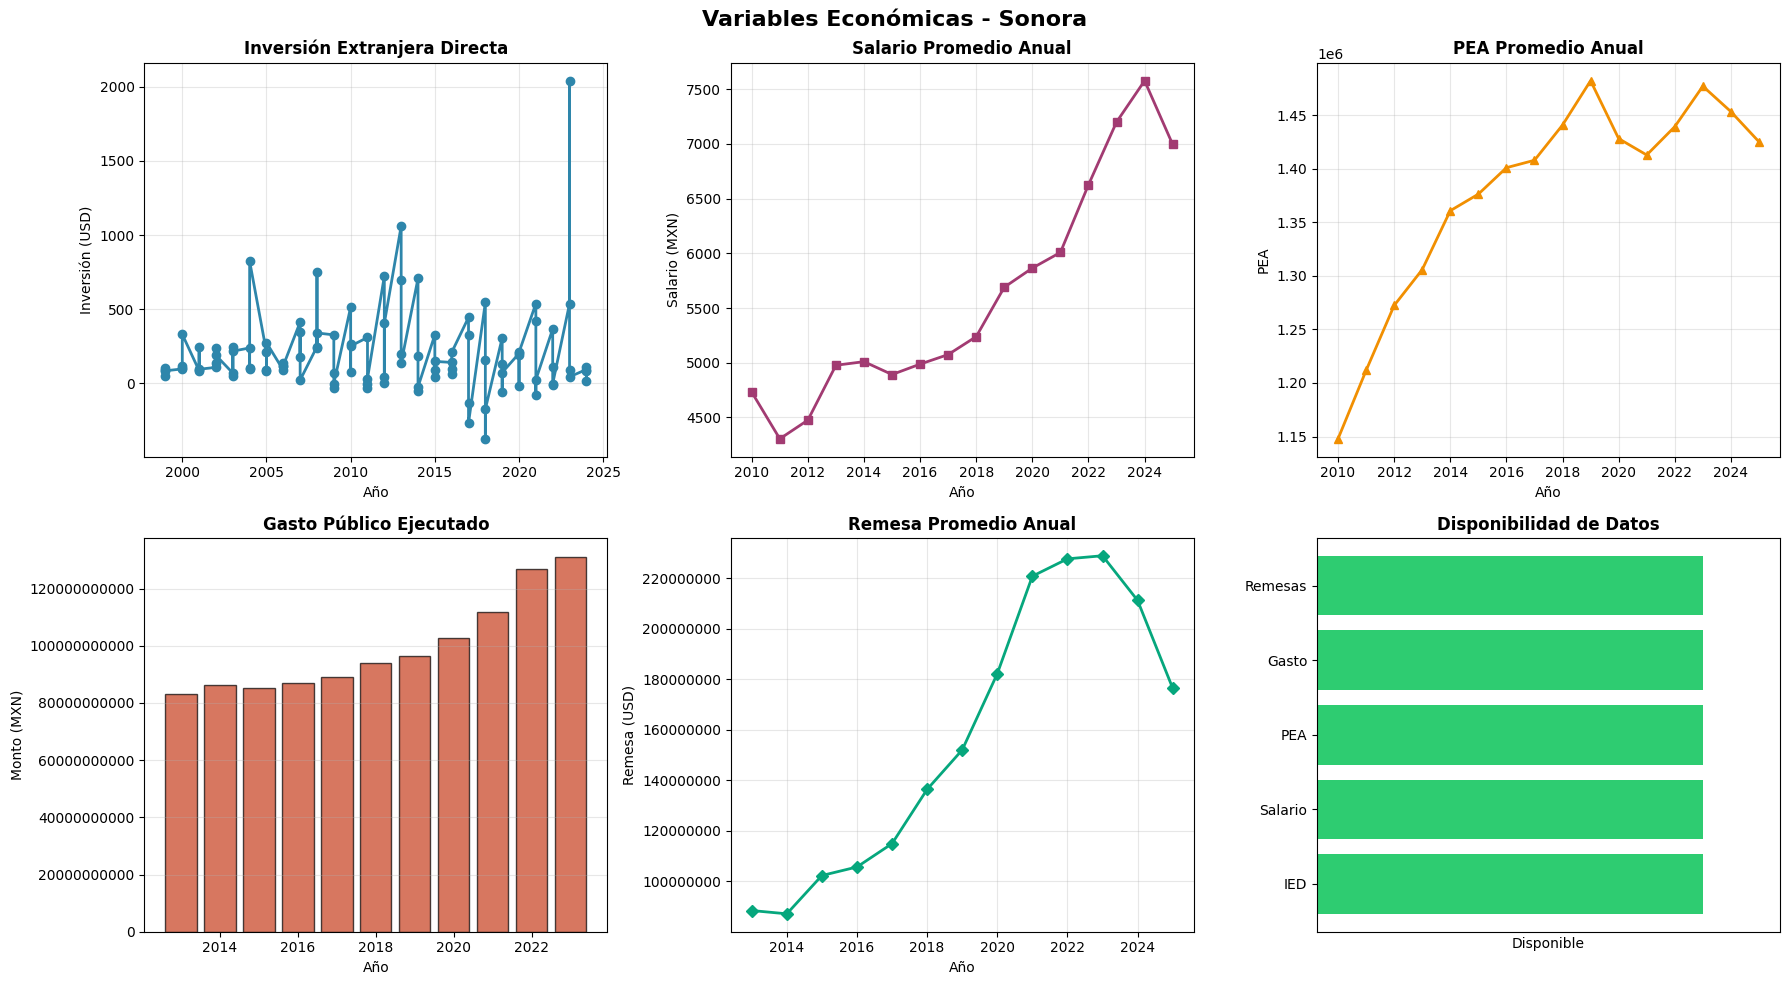

Gráficos generados correctamente para Sonora


In [18]:
# Define the state for which to generate plots
estado_a_graficar = 'Sonora'

# Create figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle(f'Variables Económicas - {estado_a_graficar}', fontsize=16, fontweight='bold')

# ================ Grafica 1: IED por Estado ===================
ax1 = axes[0, 0]
try:
    df_ied_estado = df_ied_total[df_ied_total["State"] == estado_a_graficar].sort_values("Year")
    if not df_ied_estado.empty:
        ax1.plot(df_ied_estado["Year"], df_ied_estado["Investment"], marker='o', linewidth=2, color='#2E86AB')
        ax1.set_title('Inversión Extranjera Directa', fontweight='bold')
        ax1.set_xlabel('Año')
        ax1.set_ylabel('Inversión (USD)')
        ax1.grid(True, alpha=0.3)
    else:
        ax1.text(0.5, 0.5, 'Sin datos', ha='center', va='center')
        ax1.set_title('IED - Sin datos')
except Exception as e:
    ax1.text(0.5, 0.5, f'Error: {str(e)}', ha='center', va='center', fontsize=8)
    ax1.set_title('IED - Error')

# ================ Grafica 2: Salario Promedio Anual ===================
ax2 = axes[0, 1]
try:
    df_salario_estado = df_promedio_anual_salario[df_promedio_anual_salario["State"] == estado_a_graficar].sort_values("Year")
    if not df_salario_estado.empty:
        ax2.plot(df_salario_estado["Year"], df_salario_estado["Salario Promedio Anual"],
                marker='s', linewidth=2, color='#A23B72')
        ax2.set_title('Salario Promedio Anual', fontweight='bold')
        ax2.set_xlabel('Año')
        ax2.set_ylabel('Salario (MXN)')
        ax2.grid(True, alpha=0.3)
    else:
        ax2.text(0.5, 0.5, 'Sin datos', ha='center', va='center')
        ax2.set_title('Salario - Sin datos')
except Exception as e:
    ax2.text(0.5, 0.5, f'Error: {str(e)}', ha='center', va='center', fontsize=8)
    ax2.set_title('Salario - Error')

# ================ Grafica 3: PEA Promedio Anual ===================
ax3 = axes[0, 2]
try:
    df_pea_estado = df_promedio_anual_pea[df_promedio_anual_pea["State"] == estado_a_graficar].sort_values("Year")
    if not df_pea_estado.empty:
        ax3.plot(df_pea_estado["Year"], df_pea_estado["PEA Promedio Anual"],
                marker='^', linewidth=2, color='#F18F01')
        ax3.set_title('PEA Promedio Anual', fontweight='bold')
        ax3.set_xlabel('Año')
        ax3.set_ylabel('PEA')
        ax3.grid(True, alpha=0.3)
    else:
        ax3.text(0.5, 0.5, 'Sin datos', ha='center', va='center')
        ax3.set_title('PEA - Sin datos')
except Exception as e:
    ax3.text(0.5, 0.5, f'Error: {str(e)}', ha='center', va='center', fontsize=8)
    ax3.set_title('PEA - Error')

# ================ Grafica 4: Gasto Ejecutado por Estado ===================
ax4 = axes[1, 0]
try:
    df_gasto_estado = df_gasto_total_filtered[df_gasto_total_filtered["Estado"] == estado_a_graficar].groupby('Ano')['Monto Ejecutado'].sum().reset_index()
    if not df_gasto_estado.empty:
        ax4.bar(df_gasto_estado["Ano"], df_gasto_estado["Monto Ejecutado"],
               color='#C73E1D', alpha=0.7, edgecolor='black')
        ax4.set_title('Gasto Público Ejecutado', fontweight='bold')
        ax4.set_xlabel('Año')
        ax4.set_ylabel('Monto (MXN)')
        ax4.ticklabel_format(style='plain', axis='y')
        ax4.grid(True, alpha=0.3, axis='y')
    else:
        ax4.text(0.5, 0.5, 'Sin datos', ha='center', va='center')
        ax4.set_title('Gasto - Sin datos')
except Exception as e:
    ax4.text(0.5, 0.5, f'Error: {str(e)}', ha='center', va='center', fontsize=8)
    ax4.set_title('Gasto - Error')

# ================ Grafica 5: Remesas Promedio Anual ===================
ax5 = axes[1, 1]
try:
    # Verificar si existe la columna 'Year' en df_remesas_total, si no, crearla
    if 'Year' not in df_remesas_total.columns and 'Quarter' in df_remesas_total.columns:
        df_remesas_total_temp = df_remesas_total.copy()
        df_remesas_total_temp['Year'] = df_remesas_total_temp['Quarter'].str.split('-').str[0].astype(int)
    else:
        df_remesas_total_temp = df_remesas_total

    # Crear el promedio anual de remesas
    df_remesas_promedio = df_remesas_total_temp.groupby(['State', 'Year'])['Remittance Amount'].mean().reset_index()
    df_remesas_promedio.rename(columns={'Remittance Amount': 'Remesa Promedio Anual'}, inplace=True)

    df_remesas_estado = df_remesas_promedio[df_remesas_promedio["State"] == estado_a_graficar].sort_values("Year")
    if not df_remesas_estado.empty:
        ax5.plot(df_remesas_estado["Year"], df_remesas_estado["Remesa Promedio Anual"],
                marker='D', linewidth=2, color='#06A77D')
        ax5.set_title('Remesa Promedio Anual', fontweight='bold')
        ax5.set_xlabel('Año')
        ax5.set_ylabel('Remesa (USD)')
        ax5.ticklabel_format(style='plain', axis='y')
        ax5.grid(True, alpha=0.3)
    else:
        ax5.text(0.5, 0.5, 'Sin datos', ha='center', va='center')
        ax5.set_title('Remesas - Sin datos')
except Exception as e:
    ax5.text(0.5, 0.5, f'Error: {str(e)}', ha='center', va='center', fontsize=8)
    ax5.set_title('Remesas - Error')

# ================ Grafica 6: Resumen de Disponibilidad de Datos ===================
ax6 = axes[1, 2]
try:
    # Verificar disponibilidad de remesas
    if 'Year' not in df_remesas_total.columns and 'Quarter' in df_remesas_total.columns:
        df_remesas_temp = df_remesas_total.copy()
        df_remesas_temp['Year'] = df_remesas_temp['Quarter'].str.split('-').str[0].astype(int)
    else:
        df_remesas_temp = df_remesas_total

    disponibilidad = {
        'IED': len(df_ied_total[df_ied_total["State"] == estado_a_graficar]) > 0,
        'Salario': len(df_promedio_anual_salario[df_promedio_anual_salario["State"] == estado_a_graficar]) > 0,
        'PEA': len(df_promedio_anual_pea[df_promedio_anual_pea["State"] == estado_a_graficar]) > 0,
        'Gasto': len(df_gasto_total_filtered[df_gasto_total_filtered["Estado"] == estado_a_graficar]) > 0,
        'Remesas': len(df_remesas_temp[df_remesas_temp["State"] == estado_a_graficar]) > 0
    }

    colores = ['#2ECC71' if v else '#E74C3C' for v in disponibilidad.values()]
    ax6.barh(list(disponibilidad.keys()), [1 if v else 0 for v in disponibilidad.values()], color=colores)
    ax6.set_xlim(0, 1.2)
    ax6.set_title('Disponibilidad de Datos', fontweight='bold')
    ax6.set_xlabel('Disponible')
    ax6.set_xticks([])
except Exception as e:
    ax6.text(0.5, 0.5, f'Error: {str(e)}', ha='center', va='center', fontsize=8)
    ax6.set_title('Disponibilidad - Error')

plt.tight_layout()
plt.show()

print(f"Gráficos generados correctamente para {estado_a_graficar}")

## <a name="6">6. Encontrar el marco temporal común</a>

([Ir al inicio](#0))





In [13]:
year_ranges = {}

# df_poblacion_total has only year 2020
# year_ranges['df_poblacion_total'] = (2020, 2020) # Excluido

# Determine year range for df_ied_total
if 'Quarter' in df_ied_total.columns:
    df_ied_total['Year'] = df_ied_total['Quarter'].str.split('-').str[0].astype(int)
    min_year_ied = df_ied_total['Year'].min()
    max_year_ied = df_ied_total['Year'].max()
    year_ranges['df_ied_total'] = (min_year_ied, max_year_ied)
else:
    year_ranges['df_ied_total'] = "Quarter column not found"


# Determine year range for df_salario_total
if 'Quarter' in df_salario_total.columns:
    df_salario_total['Year'] = df_salario_total['Quarter'].str.split('-').str[0].astype(int)
    min_year_salario = df_salario_total['Year'].min()
    max_year_salario = df_salario_total['Year'].max()
    year_ranges['df_salario_total'] = (min_year_salario, max_year_salario)
else:
    year_ranges['df_salario_total'] = "Quarter column not found"

# Determine year range for df_pea_total
if 'Quarter' in df_pea_total.columns:
    df_pea_total['Year'] = df_pea_total['Quarter'].str.split('-').str[0].astype(int)
    min_year_pea = df_pea_total['Year'].min()
    max_year_pea = df_pea_total['Year'].max()
    year_ranges['df_pea_total'] = (min_year_pea, max_year_pea)
else:
    year_ranges['df_pea_total'] = "Quarter column not found"

# Determine year range for df_gasto_total
if 'Ano' in df_gasto_total.columns:
    min_year_gasto = df_gasto_total['Ano'].min()
    max_year_gasto = df_gasto_total['Ano'].max()
    year_ranges['df_gasto_total'] = (min_year_gasto, max_year_gasto)
else:
    year_ranges['df_gasto_total'] = "Ano column not found"

# Determine year range for df_remesas_total
if 'Quarter' in df_remesas_total.columns:
    df_remesas_total['Year'] = df_remesas_total['Quarter'].str.split('-').str[0].astype(int)
    min_year_remesas = df_remesas_total['Year'].min()
    max_year_remesas = df_remesas_total['Year'].max()
    year_ranges['df_remesas_total'] = (min_year_remesas, max_year_remesas)
else:
    year_ranges['df_remesas_total'] = "Quarter column not found"


print("Year ranges for each dataframe:")
print(year_ranges)

# Extraer los anos minimos y maximos de cada dataframe
min_years = [year_ranges[df][0] for df in year_ranges.keys() if isinstance(year_ranges[df], tuple)]
max_years = [year_ranges[df][1] for df in year_ranges.keys() if isinstance(year_ranges[df], tuple)]

# Encontrar el ano de inicio comun (el maximo de los anos minimos)
common_start_year = max(min_years)

# Encontrar el ano de fin comun (el minimo de los anos maximos)
common_end_year = min(max_years)

print(f"El marco temporal común para todos los DataFrames es de {common_start_year} a {common_end_year}.")


# Filtrar df_ied_total
df_ied_total_filtered = df_ied_total[
    (df_ied_total['Year'] >= common_start_year) &
    (df_ied_total['Year'] <= common_end_year)
].copy()

# Filtrar df_salario_total
df_salario_total_filtered = df_salario_total[
    (df_salario_total['Year'] >= common_start_year) &
    (df_salario_total['Year'] <= common_end_year)
].copy()

# Filtrar df_pea_total
df_pea_total_filtered = df_pea_total[
    (df_pea_total['Year'] >= common_start_year) &
    (df_pea_total['Year'] <= common_end_year)
].copy()

# Filtrar df_gasto_total (la columna de ano se llama 'Ano')
df_gasto_total_filtered = df_gasto_total[
    (df_gasto_total['Ano'] >= common_start_year) &
    (df_gasto_total['Ano'] <= common_end_year)
].copy()

# Filtrar df_remesas_total
df_remesas_total_filtered = df_remesas_total[
    (df_remesas_total['Year'] >= common_start_year) &
    (df_remesas_total['Year'] <= common_end_year)
].copy()

Year ranges for each dataframe:
{'df_ied_total': (1999, 2024), 'df_salario_total': (2010, 2025), 'df_pea_total': (2010, 2025), 'df_gasto_total': (2013, 2023), 'df_remesas_total': (2013, 2025)}
El marco temporal común para todos los DataFrames es de 2013 a 2023.
